<a href="https://colab.research.google.com/github/Vivekk-007/DL/blob/main/percepton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt;


In [ ]:
df = pd.read_csv('gpa_iq.csv')
df.head()

,obs,gpa,iq,gender,concept
0,1,7.940,111,2,67
1,2,8.292,107,2,43
2,3,4.643,100,2,52
3,4,7.470,107,2,66
4,5,8.882,114,1,58


<Axes: xlabel='concept', ylabel='gpa'>

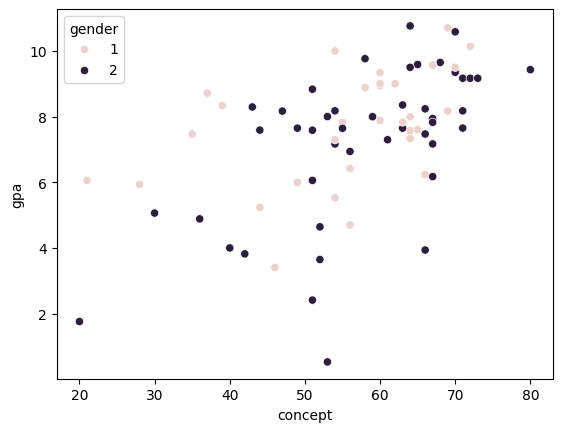

In [ ]:
sns.scatterplot(x=df['concept'], y=df['gpa'], hue=df['gender'])

In [ ]:
x = df.iloc[:,1:5]
y = df.iloc[:,3]
print("Features (x) using iloc:")
print(x.head())
print("\nTarget (y) using iloc:")
print(y.head())

Features (x) using iloc:
     gpa   iq  gender  concept
0  7.940  111       2       67
1  8.292  107       2       43
2  4.643  100       2       52
3  7.470  107       2       66
4  8.882  114       1       58

Target (y) using iloc:
0    2
1    2
2    2
3    2
4    1
Name: gender, dtype: int64


In [ ]:
from sklearn.linear_model import Perceptron

p = Perceptron()

p.fit(x, y)

Perceptron()

In [ ]:
p.coef_

array([[-120.66,   51.  ,  108.  ,  -82.  ]])

In [ ]:
p.intercept_

array([-2.])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


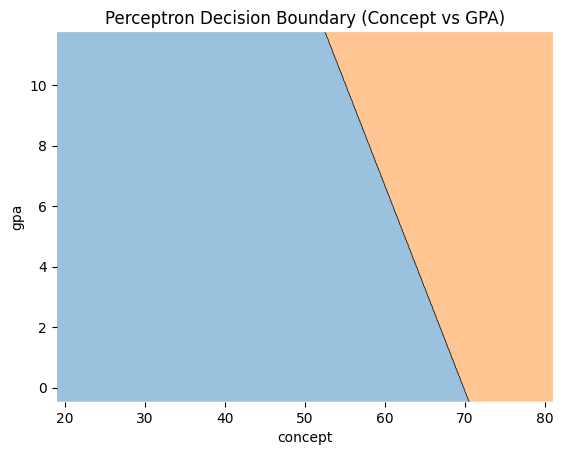

In [ ]:

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

plot_decision_regions(x.values, y.values, clf=p, feature_index=(3, 0),filler_feature_values=filler_values)
# Plot the decision boundary
plt.xlabel('concept')
plt.ylabel('gpa')
plt.title('Perceptron Decision Boundary (Concept vs GPA)') # Added a title for clarity
plt.show()

In [ ]:
df = pd.read_csv('job_placement.csv')
df['placement_status'] = df['placement_status'].map({'Placed': 1, 'Not Placed': 0})
df

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,1,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,1,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,1,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,0,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,1,62000,3.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...
695,696,Lucas Taylor,Male,23,Bachelor's,Computer Science,University of Washington,1,67000,3.8,3.0
696,697,Emma Martinez,Female,26,Bachelor's,Electronics and Communication,University of California--Berkeley,1,66000,3.9,3.0
697,698,Aiden Davis,Male,24,Bachelor's,Computer Science,University of Illinois--Urbana-Champaign,1,65000,3.8,3.0
698,699,Mia Wilson,Female,23,Bachelor's,Electrical Engineering,University of Colorado--Boulder,1,66000,3.7,2.0


In [ ]:

# Load your dataset
df = pd.read_csv('job_placement.csv')

# Optional: Print initial columns to see what you have before dropping
print("Columns before dropping:")
print(df.columns)

# Define the list of columns you want to keep
columns_to_keep = ['placement_status', 'years_of_experience', 'gpa']

# Get the list of all columns
all_columns = df.columns.tolist()

# Find the columns that are NOT in your list of columns to keep
columns_to_drop = [col for col in all_columns if col not in columns_to_keep]

df.drop(columns=columns_to_drop, inplace=True)

df['placement_status'] = df['placement_status'].map({'Placed': 1, 'Not Placed': 0})
df

Columns before dropping:
Index(['id', 'name', 'gender', 'age', 'degree', 'stream', 'college_name',
       'placement_status', 'salary', 'gpa', 'years_of_experience'],
      dtype='object')


,placement_status,gpa,years_of_experience
0,1,3.7,2.0
1,1,3.6,1.0
2,1,3.8,3.0
3,0,3.5,2.0
4,1,3.9,2.0
...,...,...,...
695,1,3.8,3.0
696,1,3.9,3.0
697,1,3.8,3.0
698,1,3.7,2.0


<Axes: xlabel='gpa', ylabel='years_of_experience'>

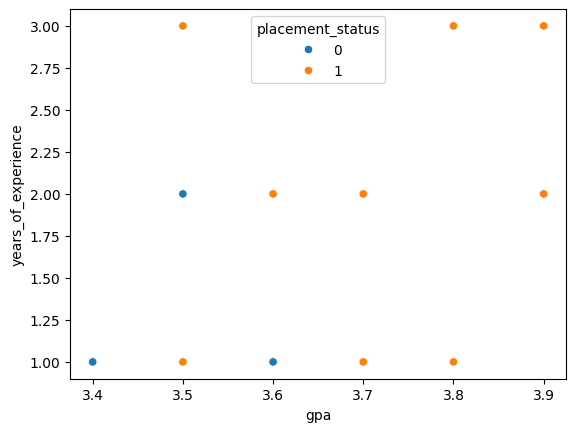

In [ ]:
sns.scatterplot(x=df['gpa'], y=df['years_of_experience'], hue=df['placement_status'])

In [ ]:
x = df.iloc[:,1:3]
y = df.iloc[:, 0]
print("Features (x) using iloc:")
print(x.head())
print("\nTarget (y) using iloc:")
print(y.head())


Features (x) using iloc:
   gpa  years_of_experience
0  3.7                  2.0
1  3.6                  1.0
2  3.8                  3.0
3  3.5                  2.0
4  3.9                  2.0

Target (y) using iloc:
0    1
1    1
2    1
3    0
4    1
Name: placement_status, dtype: int64


In [ ]:
# %%
from sklearn.linear_model import Perceptron
from sklearn.impute import SimpleImputer
import numpy as np # Ensure numpy is imported for SimpleImputer

# Create an imputer that replaces missing values (NaN) with the mean of the column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Apply the imputer to your feature data x
# The imputer expects a numpy array, so convert the DataFrame to values
x_imputed = imputer.fit_transform(x)

p = Perceptron()

# Fit the perceptron model with the imputed data
p.fit(x_imputed, y)

Perceptron()

In [ ]:
p.coef_

array([[-3.4       , 12.35479256]])

In [ ]:
p.intercept_

array([2.])

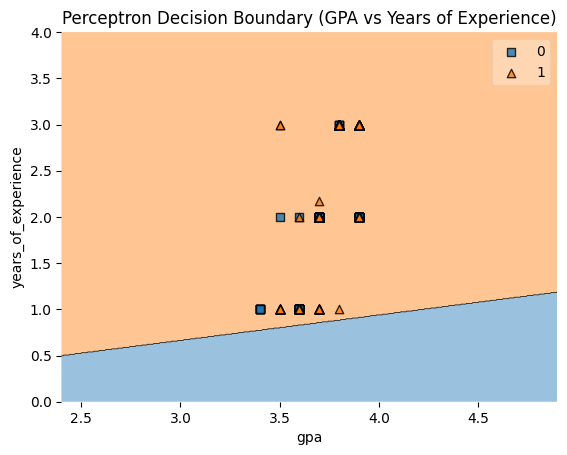

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt # Make sure plt is imported here as well

# Plot the decision boundary using the imputed data used for training
# Pass x_imputed (the numpy array output from the imputer) and y.values
plot_decision_regions(x_imputed, y.values, clf=p)

plt.xlabel('gpa')
# It seems the ylabel 'salary' is incorrect based on the data (gpa and years_of_experience).
# Change the ylabel to 'years_of_experience'.
plt.ylabel('years_of_experience')
plt.title('Perceptron Decision Boundary (GPA vs Years of Experience)') # Add a descriptive title
plt.show()